Import numpy and matplotlib:

In [47]:
import numpy as np
import matplotlib.pyplot as plt

Define Spin class:

In [48]:
class Spin:
    def __init__(self,name,JHH,JHF):
        self.name = name
        while len(JHH) < 5:
            JHH.append(0)
        self.JHH = JHH
        self.JHF = JHF

Define default parameters:

In [49]:
time = 100/1000 #100 ms - x axis limit
delta = 20/1000 #delta delay - 20 ms

Functions which do the transfer function calculation and plotting:

In [50]:
def transfer_func(spin,time = time): #plots transfer fuction for perfect echo with HF evolution
    
    x = np.arange(0, time, 0.0001)
    pi = np.pi
    JHF = spin.JHF
    JHH = spin.JHH
    if JHF == 0:
        HF_factor = 0#1
    else:
        HF_factor = np.sin(np.pi*JHF*x)
    term1 = np.cos(np.pi*x*JHH[0])**2 * np.cos(np.pi*JHH[1]*x)**2 * np.cos(np.pi*JHH[2]*x)**2 * np.cos(np.pi*JHH[3]*x)**2
    term2 = np.sin(pi*JHH[0]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[4]*x) 
    term3 = np.sin(pi*JHH[1]*x)**2 * np.cos(pi*JHH[0]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[4]*x) 
    term4 = np.sin(pi*JHH[2]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[0]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[4]*x) 
    term5 = np.sin(pi*JHH[3]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[0]*x) * np.cos(pi*JHH[4]*x) 
    term6 = np.sin(pi*JHH[4]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[0]*x) 
    
    y = (term1 + term2 + term3 + term4 + term5 + term6) * HF_factor
    
    
    return  plt.plot(x,y,label=spin.name)


def transfer_func_delta(spin,delta = delta, time=time): #plots transfer function with delta delay for second spin echo
    
    x = np.arange(0, time, 0.0001)
    pi = np.pi
    JHF = spin.JHF
    JHH = spin.JHH
    delta_factor = np.sin(pi*JHF*(x+delta)) * np.cos(pi*JHH[0]*delta)* np.cos(pi*JHH[1]*delta)* np.cos(pi*JHH[2]*delta) * np.cos(pi*JHH[3]*delta)
    
    term1 = np.cos(np.pi*x*JHH[0])**2 * np.cos(np.pi*JHH[1]*x)**2 * np.cos(np.pi*JHH[2]*x)**2 * np.cos(np.pi*JHH[3]*x)**2
    term2 = np.sin(pi*JHH[0]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[4]*x) 
    term3 = np.sin(pi*JHH[1]*x)**2 * np.cos(pi*JHH[0]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[4]*x) 
    term4 = np.sin(pi*JHH[2]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[0]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[4]*x) 
    term5 = np.sin(pi*JHH[3]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[0]*x) * np.cos(pi*JHH[4]*x) 
    term6 = np.sin(pi*JHH[4]*x)**2 * np.cos(pi*JHH[1]*x) * np.cos(pi*JHH[2]*x) * np.cos(pi*JHH[3]*x) * np.cos(pi*JHH[0]*x) 
    
    y = (term1 + term2 + term3 + term4 + term5 + term6) * delta_factor
    
    return plt.plot(x,y,label=spin.name)

Function for getting xy data from a plot:

In [51]:
def get_xy_data(plot):
    x = (plot[0][0].get_xdata())
    xy = np.empty([len(x),len(plot)+1])
    xy[:,0] = x
    for i in list(range(len(plot))):
        xy[:,i+1] = plot[i][0].get_ydata()
         
    return xy
    

Define spins and couplings: (arguments are spin name, list of HH couplings, and HF coupling)

In [52]:
#alpha glucose
s1 = Spin('H1',[3.9],3.7) 
s2 = Spin('H2',[3.9,9.4],13.1)
s3 = Spin('H3',[9.5,8.9],54.3)
s4 = Spin('H4',[8.9,10.2],13.8)
s5 = Spin('H5',[10.2,2.3,4.9],0)
s6 = Spin('H6',[2.3,12.2],1.8)
s6a = Spin("H6'",[5.,12.3],0)

#betaglucose
s1b = Spin('H1',[8.0],0)
s2b = Spin('H2',[8.0,9.1],13.7)
s3b = Spin('H3',[9.1,8.8],52.9)
s4b = Spin('H4',[8.9,10.],13.8)
s5b = Spin('H5',[10.0,2.2,5.6],1.3)
s6b = Spin('H6',[2.2,12.4],1.5)
s6ab = Spin("H6'",[5.5,12.4],0)


Plot graphs and get xy values:

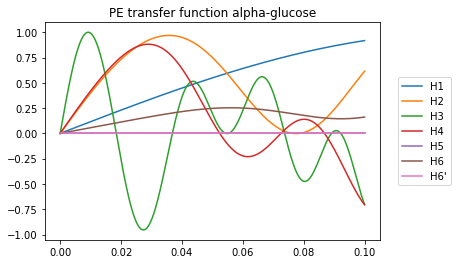

XY data (x, y1, y2, ... y7): 
 [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e-04  1.16238902e-03  4.11547476e-03 ...  0.00000000e+00
   5.65486648e-04  0.00000000e+00]
 [ 2.00000000e-04  2.32477647e-03  8.23087981e-03 ...  0.00000000e+00
   1.13097311e-03  0.00000000e+00]
 ...
 [ 9.97000000e-02  9.16364127e-01  6.06869307e-01 ... -0.00000000e+00
   1.60371091e-01 -0.00000000e+00]
 [ 9.98000000e-02  9.16828866e-01  6.10526145e-01 ... -0.00000000e+00
   1.60821829e-01 -0.00000000e+00]
 [ 9.99000000e-02  9.17292365e-01  6.14170725e-01 ... -0.00000000e+00
   1.61278956e-01 -0.00000000e+00]]


In [53]:
plt.figure()
plot1 = [transfer_func(s1),
transfer_func(s2),
transfer_func(s3),
transfer_func(s4),
transfer_func(s5),
transfer_func(s6),
transfer_func(s6a)]
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function alpha-glucose')
plt.show()
xy_alpha = get_xy_data(plot1)
print("XY data (x, y1, y2, ... y7): \n", xy_alpha)

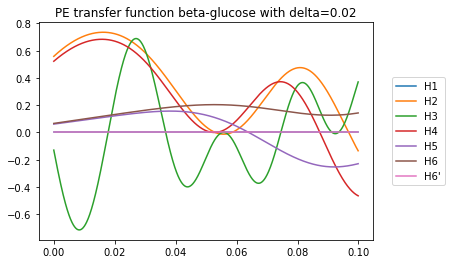

XY data (x, y1, y2, ... y7): 
 [[ 0.00000000e+00  0.00000000e+00  5.58856124e-01 ...  6.13730747e-02
   6.63227059e-02  0.00000000e+00]
 [ 1.00000000e-04  0.00000000e+00  5.60918371e-01 ...  6.16792522e-02
   6.66533296e-02  0.00000000e+00]
 [ 2.00000000e-04  0.00000000e+00  5.62970227e-01 ...  6.19854194e-02
   6.69839385e-02  0.00000000e+00]
 ...
 [ 9.97000000e-02  0.00000000e+00 -1.26530579e-01 ... -2.30591781e-01
   1.42529688e-01 -0.00000000e+00]
 [ 9.98000000e-02  0.00000000e+00 -1.30513840e-01 ... -2.30032412e-01
   1.42893743e-01 -0.00000000e+00]
 [ 9.99000000e-02  0.00000000e+00 -1.34472100e-01 ... -2.29467423e-01
   1.43261914e-01 -0.00000000e+00]]


In [54]:
plt.figure()
plot4 = [transfer_func_delta(s1b),
transfer_func_delta(s2b),
transfer_func_delta(s3b),
transfer_func_delta(s4b),
transfer_func_delta(s5b),
transfer_func_delta(s6b),
transfer_func_delta(s6ab)]
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function beta-glucose with delta=' + str(delta))
xy_beta_with_delta = get_xy_data(plot4)
plt.show()
print("XY data (x, y1, y2, ... y7): \n", xy_beta_with_delta)

To change x-limit or delta delay either change default parameters above, or call function with time and delta named arguments:

In [55]:
time_new = 150/1000
delta_new = 10/1000

Plot with new parameters:

No need to create a list of plots if xy data is not required (and in this case the get_xy_data function would not work with different x-axis limits)

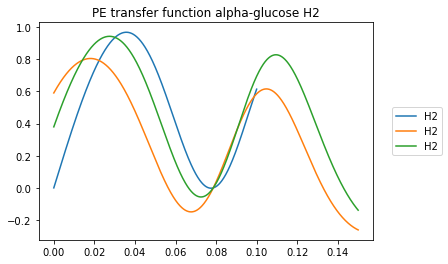

In [56]:
plt.figure()
transfer_func(s2), #default
transfer_func_delta(s2, time = time_new), #extended x-axis
transfer_func_delta(s2, time=time_new, delta = delta_new) #extended x-axis and new delta
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function alpha-glucose H2')
plt.show()


All default graphs:

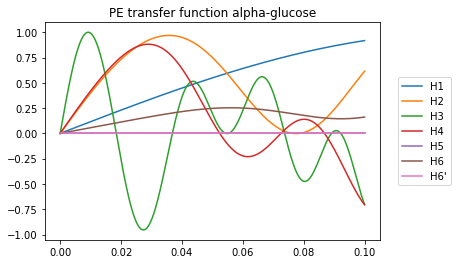

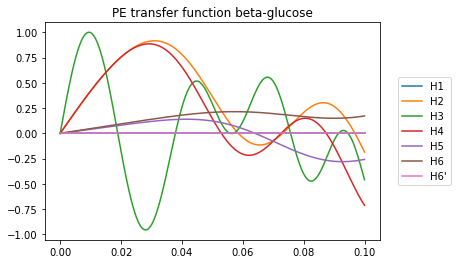

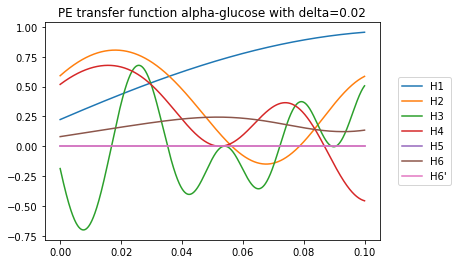

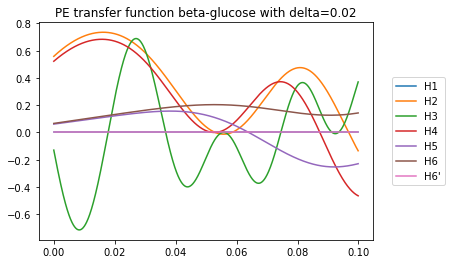

In [57]:
#plot1
plt.figure()
plot1 = [transfer_func(s1),
transfer_func(s2),
transfer_func(s3),
transfer_func(s4),
transfer_func(s5),
transfer_func(s6),
transfer_func(s6a)]
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function alpha-glucose')
xy_alpha = get_xy_data(plot1)
#plot2
plt.figure()
plot2= [transfer_func(s1b),
transfer_func(s2b),
transfer_func(s3b),
transfer_func(s4b),
transfer_func(s5b),
transfer_func(s6b),
transfer_func(s6ab)]
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function beta-glucose')
xy_beta = get_xy_data(plot2)
#plot 3
plt.figure()
plot3 = [transfer_func_delta(s1),
transfer_func_delta(s2),
transfer_func_delta(s3),
transfer_func_delta(s4),
transfer_func_delta(s5),
transfer_func_delta(s6),
transfer_func_delta(s6a)]
plt.legend()
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function alpha-glucose with delta=' + str(delta))
xy_alpha_with_delta = get_xy_data(plot3)
#plot 4
plt.figure()
plot4 = [transfer_func_delta(s1b),
transfer_func_delta(s2b),
transfer_func_delta(s3b),
transfer_func_delta(s4b),
transfer_func_delta(s5b),
transfer_func_delta(s6b),
transfer_func_delta(s6ab)]
plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left")
plt.title('PE transfer function beta-glucose with delta=' + str(delta))
xy_beta_with_delta = get_xy_data(plot4)